In [1]:
pwd

'/home/wsuser/work'

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b5f7df447f0b415aa7eeda8b38841dda = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SvOc2NQL0jaJXuj1wJJusrX39TMmA4Dzn17T7QtO1-lN',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_1 = client_b5f7df447f0b415aa7eeda8b38841dda.get_object(Bucket='animalcnn-donotdelete-pr-olyl7tsymaexhj', Key='Animal_Dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [3]:
## Load the datasets ##

In [4]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)
    

In [5]:
ls -l

total 4
drwxrwx--- 4 wsuser wscommon 4096 Sep  4 05:24 dataset/


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [8]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
ls

dataset/


In [10]:
cd '/home/wsuser/work/dataset'

/home/wsuser/work/dataset


In [11]:
ls

Testing/  Training/


In [12]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/dataset/Training",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 1238 images belonging to 4 classes.


In [13]:
x_test=train_datagen.flow_from_directory(r"/home/wsuser/work/dataset/Testing",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 326 images belonging to 4 classes.


In [14]:
len(x_test)

14

In [15]:
326/24

13.583333333333334

In [16]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [17]:
## CNN importing ##

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D,MaxPooling2D,Flatten

In [19]:
model=Sequential()

In [20]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax'))#multiclass classification

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])#optimize=>minimize error, maximize production

In [25]:
model.fit(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
52/52 [==============================] - 14s 254ms/step - loss: 1.4206 - accuracy: 0.4241 - val_loss: 1.0303 - val_accuracy: 0.5798
Epoch 2/10
52/52 [==============================] - 13s 244ms/step - loss: 0.9263 - accuracy: 0.6309 - val_loss: 0.8495 - val_accuracy: 0.6564
Epoch 3/10
52/52 [==============================] - 13s 250ms/step - loss: 0.7388 - accuracy: 0.7197 - val_loss: 0.6940 - val_accuracy: 0.7362
Epoch 4/10
52/52 [==============================] - 13s 244ms/step - loss: 0.6164 - accuracy: 0.7561 - val_loss: 0.5903 - val_accuracy: 0.7945
Epoch 5/10
52/52 [==============================] - 13s 245ms/step - loss: 0.5711 - accuracy: 0.7859 - val_loss: 0.4595 - val_accuracy: 0.8497
Epoch 6/10
52/52 [==============================] - 12s 238ms/step - loss: 0.4931 - accuracy: 0.8150 - val_loss: 0.3434 - val_accuracy: 0.9049
Epoch 7/10
52/52 [==============================] - 13s 246ms/step - loss: 0.4201 - accuracy: 0.8417 - val_loss: 0.4088 - val_accuracy: 0.8466

In [26]:
model.save('animal.h5')

In [27]:
## Test mode #

In [28]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
model=load_model('animal.h5')

In [70]:
img=image.load_img(r"/home/wsuser/work/dataset/Testing/bears/k4 (83).jpeg",targetsize=(64,64))

TypeError: load_img() got an unexpected keyword argument 'targetsize'

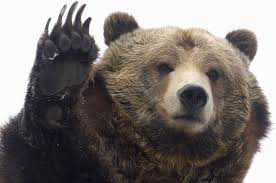

In [63]:
img

In [64]:
x=image.img_to_array(img)

In [65]:
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.]],

       ...,

       [[ 73.,  61.,  61.],
        [ 71.,  61.,  60.],
        [ 69.,  59.,  58.],
        ...,
        [252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.]],

       [[ 72.,  60.,  60.],
        [ 70.,  60.,  59.],
        [ 67.,  57.,  56.],
        ...,
        [252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.]],

       [[ 70.,  58.,  58.],
        [ 68.,  58.,  57.],
        [ 65.,  

In [66]:
x.ndim

3

In [67]:
x=np.expand_dims(x,axis=0)

In [68]:
x.ndim

4

In [69]:
pred=np.argmax(model.predict(x),axis=1)

ValueError: in user code:

    File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 64, 64, 3), found shape=(None, 183, 276, 3)


In [38]:
pred

array([1])

In [39]:
index=['bears','crows','elephants','rats']

In [40]:
index[pred[0]]

'crows'

# IBM Deployment 

In [41]:
pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 9.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [42]:
from ibm_watson_machine_learning import APIClient
wml_credential={
    "url" :"https://us-south.ml.cloud.ibm.com",
    "apikey":"7SH8ejGU26L1HkQO_Ee5Up9ZqhAOXOK0KO1zC7uDMays"     
}

In [43]:
client=APIClient(wml_credential)

In [44]:
client

In [45]:
def uid_space_name(client,animal_deployment):
    space=client.spaces.get_details()
    return (next(item for item in space['resources']if item['entity']['name']==animal_deployment)['metadata']['id'])

In [46]:
space_uid=uid_space_name(client,'animal_deployment')
print(space_uid)

92148e7c-713a-4263-b9d6-25b764cb615d


In [47]:
client.set.default_space(space_uid)

'SUCCESS'

In [48]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [49]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [50]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [51]:
ls

animal.h5  Testing/  Training/


In [52]:
!tar -zcvf animal.tgz animal.h5

animal.h5


In [53]:
import tensorflow as tf
tf.__version__

'2.7.2'

In [54]:
model_details=client.repository.store_model(model='animal.tgz',
            meta_props={
                client.repository.ModelMetaNames.NAME: "CNN Model",
                client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
                client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid,
            }
)

In [55]:
model_id=client.repository.get_model_id(model_details)

In [56]:
model_id

'da97f542-9fc5-4cc1-b7ee-6438028accea'

In [57]:
ls

animal.h5  animal.tgz  Testing/  Training/


In [58]:
client.repository.download('b602519e-35d2-4fcd-bf24-070dfc9ab153','animalcnn.tgz')

Successfully saved model content to file: 'animalcnn.tgz'


'/home/wsuser/work/dataset/animalcnn.tgz'

In [59]:
ls

animalcnn.tgz  animal.h5  animal.tgz  Testing/  Training/
